<font color='green' size='6'>**Домашняя работа 1**</font>  
<font color='#11a642' size='5'>**Тема: Машинное обучение**</font>  
<font size='5'>**Задание:**</font>  

Домашняя работа основана на данных о стоимости недвижимости.

**Описание данных:**

| Признак     | Описание                                                 |
|-------------|-----------------------------------------------------------|
| MedInc      | Средний доход домохозяйства (в десятках тысяч долларов)  |
| HouseAge    | Средний возраст домов в районе                           |
| AveRooms    | Среднее количество комнат на дом                         |
| AveBedrms   | Среднее количество спален на дом                         |
| Population  | Население района                                         |
| AveOccup    | Среднее количество человек на дом                        |

- target - стомиость недвижимости, что и нужно вам предсказать (это и есть целевой признак)

**Что нужно сделать:**

1. Проведите разведочный анализ данных (EDA)

2. Заполнить пропуски любыми 2 способами, что обсуждали на лекции. Объясните свой выбор

3. Построите модель линейной регрессии c помощью LinearRegression.

4. Оцените качество моделей. Выберите ту модель+метод заполнения пропусков, который даёт наилучший результат, и обоснуйте свой выбор.







# <font color='#11a642' size='6'> **Импорт и установка библиотек**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# <font color='#11a642' size='6'> **Загрузка данных**

In [3]:
!pip install gdown


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 1. Загрузка датасета
!gdown 1yQgwqFxwkHtZL2PZ2waF4Pg3Sb9hyHo9


Downloading...
From: https://drive.google.com/uc?id=1yQgwqFxwkHtZL2PZ2waF4Pg3Sb9hyHo9
To: c:\Users\Maks\Documents\Курс\15\df_with_nan.csv

  0%|          | 0.00/1.16M [00:00<?, ?B/s]
 45%|████▌     | 524k/1.16M [00:00<00:00, 3.30MB/s]
 90%|█████████ | 1.05M/1.16M [00:00<00:00, 3.99MB/s]
100%|██████████| 1.16M/1.16M [00:00<00:00, 4.00MB/s]


In [3]:
df = pd.read_csv('df_with_nan.csv')

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target
0,8.3252,41.0,6.984127,1.023810,322,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565,2.181467,3.422


In [5]:
# 2. Разделение признаков и целевой переменной
df_features = df.drop('Target', axis=1)
df_target = df['Target']

# <font color='#11a642' size='6'> **Разведочный анализ данных**

## <font color='#11a642' size='5'> Оцените размер вашего датасета


1.   Сколько ГБ ваш датасет
2.   Сколько строк и столбцов



In [6]:
# Сколько ГБ ваш датасет

memory_b = df.memory_usage(deep=True).sum()
memory_mb = memory_b / 1024 ** 2
memory_gb = memory_mb / 1024
print('Объем памяти, который занимает дадасет:')
print('Объем памяти в байтах: {:03.3f} B'.format(memory_b))
print('Объем памяти в мегабайтах: {:03.3f} MB'.format(memory_mb))
print('Объем памяти в гигабайтах: {:03.3f} GB'.format(memory_gb))

Объем памяти, который занимает дадасет:
Объем памяти в байтах: 1155972.000 B
Объем памяти в мегабайтах: 1.102 MB
Объем памяти в гигабайтах: 0.001 GB


In [7]:
# Сколько строк и столбцов

num_rows = df.shape[0]
num_columns = df.shape[1]
print('Количество строк:', num_rows)
print('Количество столбцов:', num_columns)

Количество строк: 20640
Количество столбцов: 7


## <font color='#11a642' size='5'> Анализ числовых (непрерывных) признаков


- для каждого признака посчитайте минимум, максимум, среднее, медиану

In [8]:
# Минимум (min), максимум (max), среднее (mean), медиана (50%) для всех признаков

print(df_features.describe().loc[['mean', 'min', 'max', '50%']])

         MedInc  HouseAge    AveRooms  AveBedrms    Population     AveOccup
mean   3.870444  28.62766    5.428796   1.096675   1425.476744     3.070655
min    0.499900   1.00000    0.846154   0.333333      3.000000     0.692308
max   15.000100  52.00000  141.909091  34.066667  35682.000000  1243.333333
50%    3.534900  29.00000    5.228856   1.048780   1166.000000     2.818116


## <font color='#11a642' size='5'> Анализ пропусков


In [9]:
# Выведем количество пропущенных значений в каждом столбце
print(df.isna().sum())

MedInc        11
HouseAge      11
AveRooms      15
AveBedrms      0
Population     0
AveOccup       0
Target         0
dtype: int64


# <font color='#11a642' size='6'> **Разделите данные на трейн и тест**

In [10]:
X = df_features
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <font color='#11a642' size='6'> **Подготовка данных к обучению**



1. Обработка пропусков любыми 2 способами, изученных на лекции




In [11]:
# Обработка пропусков.
# Несмотря на то, что количество пропущенных значений невелико, мы не будем удалять строки с пропущенными
# значениями, т.к. это может уменьшить объем данных, необходимых для обучения.
# Вместо этого, мы заполним пропуски средним значением и медианой
# 1 способ. Заполнение пропусков средним значением
train_mean = X_train.copy()
test_mean = X_test.copy()
train_mean.fillna(train_mean.mean(), inplace=True)
test_mean.fillna(train_mean.mean(), inplace=True)

# 2 спопоб. Заполнение пропусков медианой
train_median = X_train.copy()
test_median = X_test.copy()
train_median.fillna(train_median.median(), inplace=True)
test_median.fillna(train_median.median(), inplace=True)

# <font color='#11a642' size='6'> **Построение моделей машинного обучения**

## <font color='#11a642' size='5'> Построение линейной регрессии с помощью LinearRegression


In [14]:
# 1 способ. Заполнение пропусков средним значением
model_mean = LinearRegression()
model_mean.fit(train_mean, y_train)

# 2 способ. Заполнение пропусков медианой
model_median = LinearRegression()
model_median.fit(train_median, y_train)

LinearRegression()

### <font color='#11a642' size='4'> Оценка качества  всех моделей


Предсказанные значения: [1.0014537  1.5601266  2.67631911 2.64746347 1.9834089  2.1771837
 2.658779   2.16556091 2.42766032 4.23152517] 

Истинные значения: 20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
13311    1.58700
7113     1.98200
7668     1.57500
18246    3.40000
5723     4.46600
Name: Target, dtype: float64 

Mean Squared Error: 0.643
R^2 Score: 0.510
Mean Absolute Error: 0.580


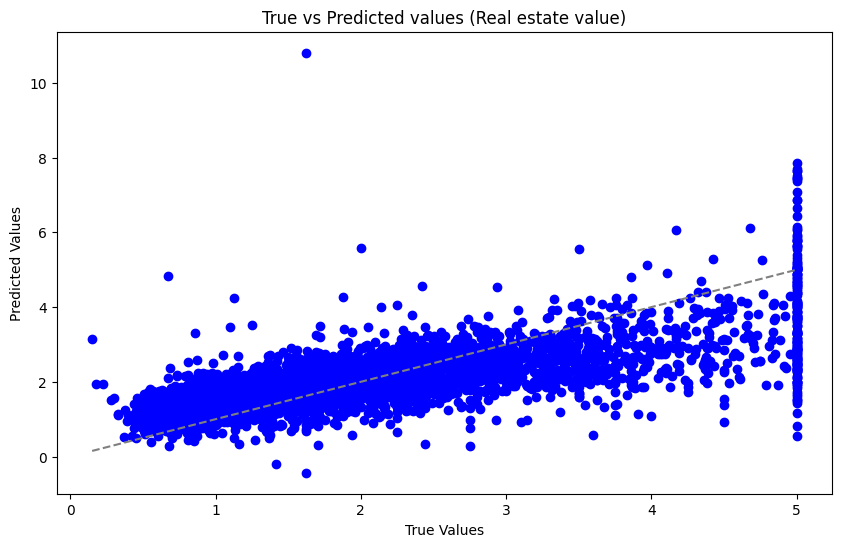

Предсказанные значения: [1.00154028 1.56019308 2.6763726  2.64744701 1.98357871 2.17711704
 2.65891778 2.16568862 2.42732937 4.23165701] 

Истинные значения: 20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
13311    1.58700
7113     1.98200
7668     1.57500
18246    3.40000
5723     4.46600
Name: Target, dtype: float64 

Mean Squared Error: 0.643
R^2 Score: 0.509
Mean Absolute Error: 0.580


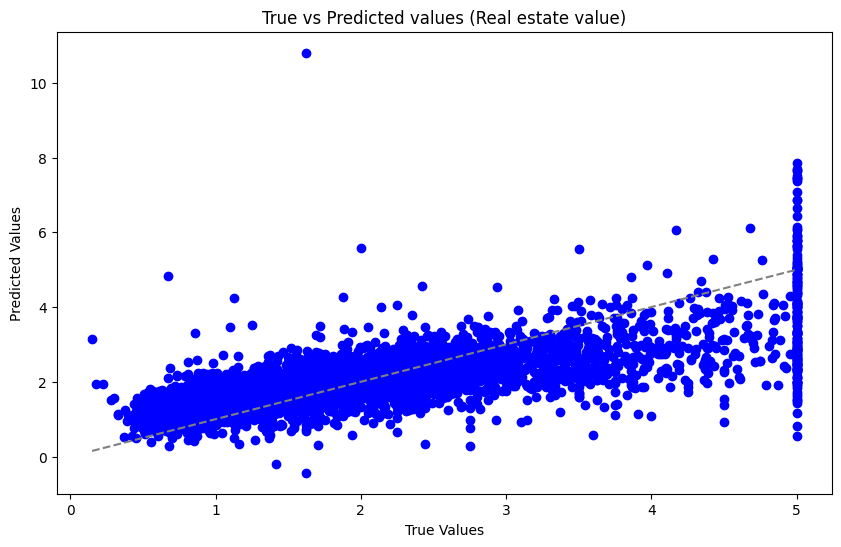

In [15]:
# 1 способ. Заполнение пропусков средним значением

# Предсказание на тестовой выборке
y_pred_mean = model_mean.predict(test_mean)

# # Промежуточный вывод
print(f'Предсказанные значения: {y_pred_mean[:10]}', '\n')
print(f'Истинные значения: {y_test[:10]}', '\n')

# Вычисление метрик
mse_mean = mean_squared_error(y_test, y_pred_mean)
r2_mean = r2_score(y_test, y_pred_mean)
mae_mean = mean_absolute_error(y_test, y_pred_mean)

# Вывод результатов
print(f'Mean Squared Error: {mse_mean:.3f}')
print(f'R^2 Score: {r2_mean:.3f}')
print(f'Mean Absolute Error: {mae_mean:.3f}')

# График
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mean, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted values (Real estate value)')
plt.show()

# 2 способ. Заполнение пропусков медианой
# Предсказание на тестовой выборке
y_pred_median = model_median.predict(test_median)

# # Промежуточный вывод
print(f'Предсказанные значения: {y_pred_median[:10]}', '\n')
print(f'Истинные значения: {y_test[:10]}', '\n')

# Вычисление метрик
mse_median = mean_squared_error(y_test, y_pred_median)
r2_median = r2_score(y_test, y_pred_median)
mae_median = mean_absolute_error(y_test, y_pred_median)

# Вывод результатов
print(f'Mean Squared Error: {mse_median:.3f}')
print(f'R^2 Score: {r2_median:.3f}')
print(f'Mean Absolute Error: {mae_median:.3f}')

# График
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_median, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted values (Real estate value)')
plt.show()

# <font color='#11a642' size='4'> Ваши выводы
- какую из моделей вы рекомендуете использовать для прогноза? Почему?



Результаты метрик обеих моделей практически одинаковые. Из-за того, что коэффициент детерминации немного выше у модели, в которой мы заполняли пропуски средним значением, то лучше использовать ее.
Из-за того, что в данных присутствуют выбросы, график линейной регрессии немного смещен.